In [ ]:
import praw

reddit = praw.Reddit(client_id='ihw6XZbOPHQVhQ',
                     client_secret='mhxPjGNsW-evMzXXH4F6H4ZuZGs',
                     password="Smartypants86",
                     user_agent='Reddit_Post_Study',
                     username='Livingforthelibrary'
                     )

print(reddit.user.me())

In [ ]:
import praw
import csv
from datetime import datetime
import json
import codecs
import os 

maxCount = 1000  # change depending on how much data you need

def main():
    fileName = "hotties" + str(maxCount) + "_entries_" + datetime.now().strftime('%Y%m%d') + ".csv"
    writer = csv.writer(open(fileName, 'wt', encoding = 'utf-8'))
    writer.writerow(['no.', 'url', 'date', 'author', 'score', 'title', 'body', 'comments'])   
    reddit = praw.Reddit(client_id='ihw6XZbOPHQVhQ',
                     client_secret='mhxPjGNsW-evMzXXH4F6H4ZuZGs',
                     password='Smartypants86',
                     user_agent='Reddit_Post_Study',
                     username='Livingforthelibrary'
                     )
    print("Retrieving data...", end="", flush=True)
    get_data(reddit, writer)
    print("Done!")
    
def get_data(reddit, writer):
    itemCount = 0
    commentCount = 0
    params = {'sort':'new', 'limit':None, 'syntax':'cloudsearch'}
    for submission in reddit.subreddit('hottiesfortrump').hot(limit=None): 
        #limit=None sets max to 1000. Instead of .hot you can also try .search('SEARCHTERM', **params)
        itemCount += 1
        timestamp = submission.created
        date = datetime.fromtimestamp(timestamp).strftime('%Y' + '-' + '%m' + '-' + '%d')
        title = submission.title
        url = submission.url
        body = submission.selftext
        author = submission.author
        score = submission.score
        commentList = []
        submission.comments.replace_more(limit=None)
        for top_level_comment in submission.comments:
            commentCount += 1
            commentList.append(top_level_comment.body)
        comments = '\n'.join(commentList)
        writer.writerow( (itemCount, url, date, author, score, title, body, comments) )
        print(".", end="", flush=True)
        if itemCount == maxCount:
            print("\n" + "Found " + str(itemCount) + " posts")
            print("Found " + str(commentCount) + " comments")
            break

main()

In [2]:
def read_file(filename):
    "Read the contents of FILENAME and return as a string."
    # insert your code here
    infile = open(filename)
    contents = infile.read()
    infile.close()
    return contents

In [3]:
read_file("hotties1000_entries_20180805.csv")

'no.,url,date,author,score,title,body,comments\n1,https://i.imgur.com/ZBceGZP.jpg,2018-08-05,magister0,65,@Pamela_Caruso on Instagram,,https://www.instagram.com/Pamela_Caruso/\n2,https://i.imgur.com/57Oitmq.jpg,2018-08-05,magister0,117,@angel_marie50 on Instagram,,"I’d collude with her any day\nhttps://www.instagram.com/angel_marie50/"\n3,https://www.reddit.com/r/hottiesfortrump/comments/94lsz9/i_have_finally_found_my_tribe/,2018-08-04,QanonMilf,91,I have finally found my TRIBE!!!,I love all of you and am so glad I found you. I have been in the drudges of r/redacted and r/conspiracy all the while this haven has been waiting! #MAGA,"You even check out t_d?\nI would post this on The_donald instead\nyou\'re supposed to post pics of yourself here lol\n[removed]"\n4,https://i.redd.it/rj8fdr45uyd11.jpg,2018-08-04,r2depor2,277,UK hottie.,,"She looks like she \'walked away\'. Very cool that a lot of people are waking up, despite the best efforts from the MSM and all the rest of em. \nWho is sh

In [1]:
hotties_raw= open("hotties1000_entries_0804.txt").read()

In [2]:
hotties_raw

'no.,url,date,author,score,title,body,comments\n1,https://www.reddit.com/r/hottiesfortrump/comments/94lsz9/i_have_finally_found_my_tribe/,2018-08-04,QanonMilf,11,I have finally found my TRIBE!!!,I love all of you and am so glad I found you. I have been in the drudges of r/redacted and r/conspiracy all the while this haven has been waiting! #MAGA,You even check out t_d?\n2,https://i.redd.it/rj8fdr45uyd11.jpg,2018-08-04,r2depor2,264,UK hottie.,,"She looks like she \'walked away\'. Very cool that a lot of people are waking up, despite the best efforts from the MSM and all the rest of em. \nWho is she?  Asking for a friend....\nDamn she\'s fine - I wish the UK had more MAGA hotties though, we don\'t have enough which is quite sad\nShe’s a UK pede. Was on T_D awhile back talking about how she is hoping to get employment in the US so she can escape UK’s tyranny. \nAnyone know where I could get that t shirt?\nLove your Trump tank shirt\nI got the same shirt yay\nOi, ya got a loicense for dem 

In [3]:
type(hotties_raw)

str

## Topic Model

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
%matplotlib inline

from nltk import word_tokenize



In [5]:
def chunk(tokens, size):
    return list(zip(*[tokens[i:: size] for i in range(size)]))

In [6]:
hotties_tokenized= word_tokenize(hotties_raw)

In [7]:
def topicModel(docs, numTopics=16, numWords=15, maxFeats=None): 
    cv = CountVectorizer(stop_words='english', 
                         min_df=0.1, max_df=0.9, max_features=maxFeats)
    counts = cv.fit_transform(docs)
    wordLabels = cv.get_feature_names()
    lda = LatentDirichletAllocation(n_topics=numTopics, max_iter=10, 
                                    learning_method='online',
                                    learning_offset=50., random_state=0)
    lda.fit_transform(counts)
    for i, topic in enumerate(lda.components_):
        print("Topic {}".format(i))
        print(" ".join([wordLabels[i] for i in topic.argsort()[:-numWords - 1:-1]]))
    return lda, counts, cv

In [8]:
chunks = [' '.join(chunk) for chunk in chunk(hotties_tokenized, 400)]

In [9]:
lda, counts, cv = topicModel(chunks)

/Users/aubreyjean/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0
01 trump 2018 president just said people fuck jpg got like sub highenergyhotties going 2885
Topic 1
2018 03 15 www new looks seen agree 13 thanks doing lot scontent like girls
Topic 2
2017 trump highenergyhotties imgur 2018 jpg 12 like 08 maga great hot best redd got
Topic 3
2018 04 imgur instagram http trump jpg 30 nice women like png looking trigger just
Topic 4
2018 04 know ve just sub comments love deplorable beautiful imgur guys 12 reddit jpg
Topic 5
libs just people black white trump american better liberals maga cucks hot did thought feel
Topic 6
trump love look like looks women people long 2018 supporters cute posts come president sub
Topic 7
2018 02 trump like removed imgur right liberal come gun jpg just know years look
Topic 8
obama 15 01 scontent highenergyhotties e35 american trump jpg cdninstagram t51 2885 2018 atl3 years
Topic 9
03 2018 great jpg redd make wow like damn thank title woman cucks looks e35
Topic 10
jpg 15 2017 highenergyhotties trump scontent cdnins

## Word Frequency

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

In [11]:
for char in punctuation:
    hotties_nopunc = hotties_raw.replace(char, "")

In [12]:
hotties_nopunc2 = hotties_nopunc.replace("\\n", " ")
hotties_nopunc2

'no.,url,date,author,score,title,body,comments\n1,https://www.reddit.com/r/hottiesfortrump/comments/94lsz9/i_have_finally_found_my_tribe/,2018-08-04,QanonMilf,11,I have finally found my TRIBE!!!,I love all of you and am so glad I found you. I have been in the drudges of r/redacted and r/conspiracy all the while this haven has been waiting! #MAGA,You even check out t_d?\n2,https://i.redd.it/rj8fdr45uyd11.jpg,2018-08-04,r2depor2,264,UK hottie.,,"She looks like she \'walked away\'. Very cool that a lot of people are waking up, despite the best efforts from the MSM and all the rest of em. \nWho is she?  Asking for a friend....\nDamn she\'s fine - I wish the UK had more MAGA hotties though, we don\'t have enough which is quite sad\nShe’s a UK pede. Was on T_D awhile back talking about how she is hoping to get employment in the US so she can escape UK’s tyranny. \nAnyone know where I could get that t shirt?\nLove your Trump tank shirt\nI got the same shirt yay\nOi, ya got a loicense for dem 

In [13]:
 
stop_words = set(stopwords.words('english'))
 
hotties_tokens01 = word_tokenize(hotties_nopunc2)
 
hotties_nostop = [w for w in hotties_tokens01 if not w in stop_words]
 
hotties_nostop = []
 
for w in hotties_tokens01:
    if w not in stop_words:
        hotties_nostop.append(w)
 

print(hotties_nostop)

['no.', ',', 'url', ',', 'date', ',', 'author', ',', 'score', ',', 'title', ',', 'body', ',', 'comments', '1', ',', 'https', ':', '//www.reddit.com/r/hottiesfortrump/comments/94lsz9/i_have_finally_found_my_tribe/,2018-08-04', ',', 'QanonMilf,11', ',', 'I', 'finally', 'found', 'TRIBE', '!', '!', '!', ',', 'I', 'love', 'glad', 'I', 'found', '.', 'I', 'drudges', 'r/redacted', 'r/conspiracy', 'waiting', '!', '#', 'MAGA', ',', 'You', 'even', 'check', 't_d', '?', '2', ',', 'https', ':', '//i.redd.it/rj8fdr45uyd11.jpg,2018-08-04', ',', 'r2depor2,264', ',', 'UK', 'hottie.', ',', ',', "''", 'She', 'looks', 'like', "'walked", 'away', "'", '.', 'Very', 'cool', 'lot', 'people', 'waking', ',', 'despite', 'best', 'efforts', 'MSM', 'rest', 'em', '.', 'Who', '?', 'Asking', 'friend', '...', '.', 'Damn', "'s", 'fine', '-', 'I', 'wish', 'UK', 'MAGA', 'hotties', 'though', ',', "n't", 'enough', 'quite', 'sad', 'She', '’', 'UK', 'pede', '.', 'Was', 'T_D', 'awhile', 'back', 'talking', 'hoping', 'get', 'emplo

In [14]:
from collections import Counter
freq = Counter(hotties_nostop)
freq.most_common(75)

[(',', 6566),
 ('.', 3543),
 ("''", 2499),
 (':', 1469),
 ('!', 1444),
 ('I', 1253),
 ('https', 1143),
 ('?', 950),
 ("'s", 622),
 (']', 600),
 ('[', 597),
 ('``', 518),
 ("n't", 492),
 ('...', 491),
 ('like', 413),
 (')', 403),
 ('Trump', 390),
 ('’', 349),
 ('(', 322),
 ('removed', 315),
 ('The', 255),
 ('women', 250),
 ('MAGA', 204),
 ('one', 189),
 ('This', 187),
 ('get', 180),
 ('You', 165),
 ('love', 164),
 ('would', 164),
 ('She', 161),
 ('We', 158),
 ('sub', 158),
 ("'m", 154),
 ('That', 149),
 ('people', 147),
 ('America', 146),
 ('deleted', 141),
 ('hot', 135),
 ("'re", 133),
 ('It', 125),
 ('What', 122),
 ('see', 121),
 ('know', 109),
 ('best', 107),
 ('http', 103),
 ('much', 100),
 ('right', 98),
 ('beautiful', 97),
 ('#', 96),
 ('woman', 96),
 ('think', 96),
 ('looks', 94),
 ('Nice', 92),
 ('trump', 92),
 ('-', 91),
 ('want', 90),
 ('great', 89),
 ('&', 87),
 ('got', 86),
 ('girl', 85),
 ('even', 83),
 ('look', 83),
 ('A', 83),
 ('They', 81),
 ('@', 80),
 ('left', 80),
 ('

 ## TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [16]:
tfidf=  TfidfVectorizer(use_idf=False, max_features=800)

In [17]:
tf = tfidf.fit_transform([hotties_raw])

In [18]:
tfDense=  tf.todense()

In [19]:
tfidf =  TfidfVectorizer(use_idf=False, max_features=800)

In [20]:
hotties_Tf = tfidf.fit_transform(hotties_nostop)

In [21]:
hotties_TfDense = hotties_Tf.todense()

In [22]:
labels=  tfidf.get_feature_names()

In [23]:
hotties_DF = pd.DataFrame(tfDense, index=['Hotties'], 
                    columns=labels)
hotties_DF

,000,01,02,03,04,05,06,07,08,09,...,year,years,yes,yet,you,young,your,youtu,youtube,zero
Hotties,0.023029,0.019087,0.015352,0.018672,0.026348,0.019502,0.042738,0.027385,0.022406,0.048962,...,0.006846,0.010788,0.006017,0.198337,0.003942,0.066389,0.004357,0.002697,0.003319,0.002697


In [24]:
hotties_25= hotties_DF.max().sort_values(ascending=False).head(25)

In [25]:
hotties_25

tax          0.462648
times        0.266593
https        0.239208
another      0.214934
islam        0.213690
coming       0.209540
yet          0.198337
talking      0.182777
no           0.179250
they         0.170329
jesus        0.169084
2016         0.137757
in           0.133193
kids         0.124894
hey          0.118463
follow       0.117426
triggered    0.108712
obviously    0.108712
around       0.102488
self         0.095642
like         0.089210
imgur        0.086306
haters       0.078007
hello        0.075103
beat         0.074480
dtype: float64

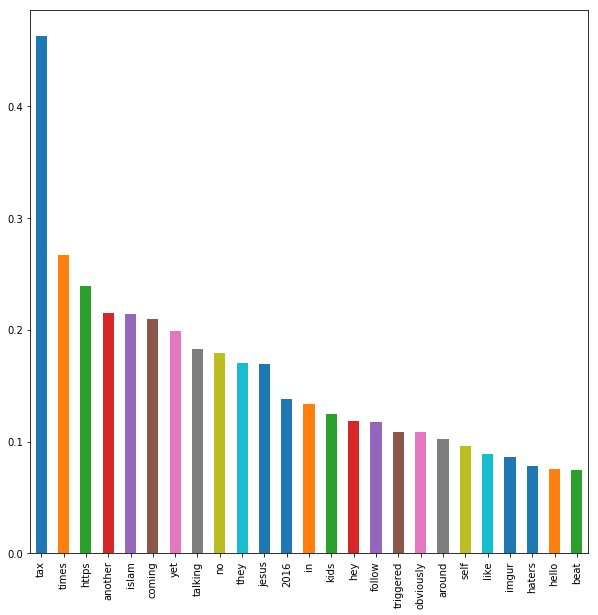

In [26]:
hotties_25.plot(kind="bar")

## Concordances


In [27]:
import nltk
from nltk import word_tokenize as tokenize


import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= [10,5]

In [28]:
from nltk.text import Text

In [29]:
hotties_tokens2 = tokenize(hotties_raw)
hotties_text = Text(hotties_tokens2)

### From the TF-IDF anbd Topic Model

In [30]:
hotties_text.concordance("libs") 

Displaying 25 of 33 matches:
`` '' Charlie kirk '' '' ? All faggy libs should be sent to Russia for `` '' i
e 's a wolf in sheeps clothing . All libs must be locked up and sent away . It
 there . 10/10 Who is this ? ? ? Hey Libs ! This is what a real woman looks li
ke these on our side . Hot as hell . Libs would n't have a chance with either 
A I 've ever seen . locked at zero . libs triggered on asses ? '' 115 , http :
eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee Libs cant stand it it ’ s hilarious ! Loo
ergyHotties,63 , '' Happy Memo Day . Libs , member this line , `` '' Cause you
 that was blocked . Riiiiiight ... . Libs love to brigade this sub . Do n't th
? Who left the door open and let the libs in ? ? Liberals are just to weak to 
2018-01-07 , HighEnergyHotties,359 , Libs are on the wrong side of history . T
 from Trump 's tax cuts . Should n't libs be upvoting this ? Do n't you `` '' 
the best posts here ever . No wonder libs are mad . They ca n't win , let alon
 by the majority of Bla

In [31]:
hotties_text.concordance("cucks") 

Displaying 25 of 62 matches:
instead . Lol this dumb bitch do the cucks really hate this amazing woman . god
s sub haaaaard . Probably some incel cucks and some disgusting fatass girls who
osplay ? 😆 What , a paid model ? The cucks in here lol Noice 👌 Did n't notice t
t people do n't we folks ? ? Let the cucks brigade , they 're used to just watc
re 2 of the worst ones . LOL twitter cucks already deleted the image . ( ( ( Th
ge , guys . These chicks do n't like cucks . YouTube 's favorite show ! 💂🏻‍♂️💂🏻
egressive wannabe fascists lol . Hey cucks , looks like it 's about time to tak
b bois are . # sad # maga Shariablue cucks , your lives are worthless Definitel
its . Guys . Don ’ t listen to these cucks . I ’ m sure they ’ d love to see Hi
eing brigaded - nothing for you here cucks move along рамп / Россия ! DACA ? ЗА
 Why is it so hard for these soy boy cucks to understand that A LOT of people a
eat my cum so hard to this , liberal cucks can go around with there ugly girls 
HE BEST GOD

In [38]:
hotties_text.concordance("maga") 

Displaying 25 of 221 matches:
hile this haven has been waiting ! # MAGA , You even check out t_d ? 2 , https
she 's fine - I wish the UK had more MAGA hotties though , we do n't have enou
 country🇺🇲 Sauce for this voluptuous MAGA hottie ? Yum ! I need some private t
9Eb.jpg,2018-07-30 , ndsl-dacc,377 , MAGA in the pool , , '' That 's the hotte
pCNB.jpg,2018-07-20 , ndsl-dacc,53 , MAGA duo , , '' Seriously suspicious abou
xxMisery,250 , Was told to post here MAGA ! , , '' I ’ m not a scientist but t
here more pics of yourself wearing a MAGA hat ? You are a lovely supporter . G
 . Get it girl You were told right ! MAGA ! Beautiful . You should post in The
acks all I see are naked , gay men.. MAGA women are so beautiful . I used to s
ted Nothing uglier than a woman in a MAGA hat . Tramp stamp and KKK tattoos of
hot_Gangster,587 , Out of the closet MAGA for Trump , , '' Trump supporters ha
WOOWWWWW You have such great style ! MAGA ! That looks like a Melania outfit .
adypede sent this to m

In [33]:
hotties_text.concordance("tax")

Displaying 22 of 22 matches:
g them . Lol why . Now that Trump ’ s tax cuts have been passed we are going to
 waiting to happen . I do n't want my tax dollars going to removing her skin ca
reat bod , Patriot ! Talk about Trump tax cuts I hate it when good looking broa
uel expenses still too much , or that tax break not hit you yet ? Wait , you 'r
 off Trump voters who are the primary tax payers and businessmen of this world 
y . No matter what your skin color or tax bracket is , we are all Americans . A
 low ? Dow Jones at record high ? The tax cut that will save us all $ $ $ ? Go 
 , just wait until you see the GOP 's tax plan '' 307 , https : //youtu.be/WOXF
 woman who will benefit from Trump 's tax cuts . Should n't libs be upvoting th
t Facebook . Also , happy to hear the tax restructuring allegedly helps you . I
our ass ? I support women . I support tax cuts . But I also realize that by mak
g about what we 're gunna do with our tax cut money . `` , , '' Best hotties 😛 
-22 , HighE

In [34]:
hotties_text.concordance("kids")

Displaying 17 of 17 matches:
a school cuz I wan na shoot a lot of kids inside you . are there more pics of 
vote ? What sad people these liberal kids are She should do porn instead . Lol
rthless Definitely needs a NSFW . My kids are sitting beside me ! Other than t
upreme label on one of these all the kids will want one `` 193 , https : //78.
nials . They are growing up like the kids of the 80 's under Reagan with econo
r . [ removed ] Mostly because 80 's kids are raising them . You know the kind
 its original purpose . Yeah , those kids . Where is the brazzers logo ? This 
there 's the whole thing where these kids do n't even understand what a fuckin
hool completion rate went up . Black kids stayed longer in high school . '' ''
ks pretty refreshing . was it on the kids menu at the local dive bar ? hahahah
ved ] yowzer ! Is triggered what the kids say when they 're aroused ? I 'm mad
uch is Russia paying you dear ? Look kids an attention whore [ deleted ] '' 54
her immigrant nanny for

In [35]:
hotties_text.concordance("times")

Displaying 14 of 14 matches:
and whale or a tranny ! Get with the times ! Face looks ugly from what I can se
e 's been to planned parenthood more times than trump has cheated on a wife `` 
/AmberNicholeMiller/ Nice I nutted 2 times so far `` 101 , https : //i.imgur.co
more pics from this shoot here a few times ! Is this OC from OP ? [ deleted ] I
ubreddit upvoting a highschooler 150 times That ’ s fair and true . Better than
 mean you tried to commit suicide 11 times ? '' 241 , https : //i.redd.it/47br6
p said he would lock her up multiple times on the campaign trail . When trump t
cs . It failed miserably the first 2 times . No credible economist say it will 
res . Hell , even I upvoted a couple times because boobies . Just my two cents 
’ re proud of yourself ! There are 6 times here where there is no space between
 of body art but would nutt numerous times Buh gawd ! Never forget ! https : //
r who I 'd like to mate with about 4 times a day ! https : //www.instagram.com/
ly farmed p